In [1]:
#import neccessary libraries
import tensorflow as tf
from tensorflow import keras 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import regularizers

In [2]:
#load data from file
X_train = np.load('X_train.npy',allow_pickle=True)
y_train = np.load('y_train.npy',allow_pickle=True)
X_test = np.load('X_test.npy',allow_pickle=True)
y_test = np.load('y_test.npy',allow_pickle=True)
X_valid = np.load('X_valid.npy',allow_pickle=True)
y_valid = np.load('y_valid.npy',allow_pickle=True)

In [3]:
#shuffle array in same way
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_valid, y_valid= shuffle(X_valid, y_valid, random_state=0)

In [4]:
#rescale image
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [5]:
X_train = X_train[...,np.newaxis]
X_valid = X_valid[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [6]:
X_train.shape

(48300, 80, 80, 1)

In [7]:
X_test.shape

(16100, 80, 80, 1)

In [8]:
X_valid.shape

(16100, 80, 80, 1)

In [9]:
print(y_train)

[ 69  65  20 ...  81  84 106]


In [10]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[80,80,1]))
model.add(keras.layers.Dense(400,activation="relu"))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(161,activation="softmax"))

In [11]:
model.layers

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 400)               2560400   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 161)               16261     
Total params: 2,676,961
Trainable params: 2,676,961
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1510/1510 [==============================] - 13s 8ms/step - loss: 4.7111 - accuracy: 0.0392 - val_loss: 2.9719 - val_accuracy: 0.2622
Epoch 2/10
1510/1510 [==============================] - 10s 6ms/step - loss: 2.6893 - accuracy: 0.3183 - val_loss: 2.1827 - val_accuracy: 0.4329
Epoch 3/10
1510/1510 [==============================] - 8s 5ms/step - loss: 2.0602 - accuracy: 0.4607 - val_loss: 1.8464 - val_accuracy: 0.5186
Epoch 4/10
1510/1510 [==============================] - 8s 5ms/step - loss: 1.7274 - accuracy: 0.5478 - val_loss: 1.7220 - val_accuracy: 0.5450
Epoch 5/10
1510/1510 [==============================] - 8s 5ms/step - loss: 1.5538 - accuracy: 0.5847 - val_loss: 1.6017 - val_accuracy: 0.5825
Epoch 6/10
1510/1510 [==============================] - 8s 5ms/step - loss: 1.3895 - accuracy: 0.6274 - val_loss: 1.4337 - val_accuracy: 0.6244
Epoch 7/10
1510/1510 [==============================] - 7s 5ms/step - loss: 1.2669 - accuracy: 0.6571 - val_loss: 1.3623 - val_accurac

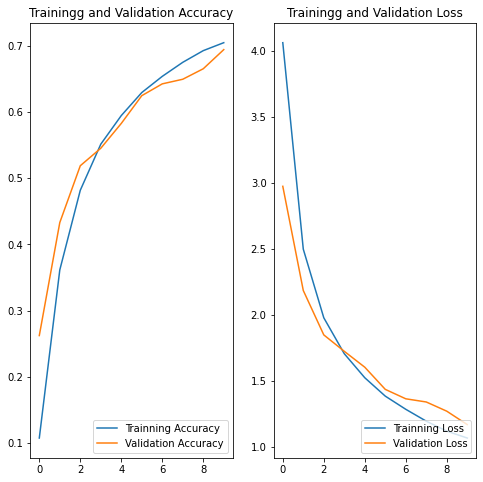

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10) #num of epoch

plt.figure(figsize=(8,8))

#1 row 2 columnn
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training and Validation Loss")
plt.show()

In [16]:
score = model.evaluate(X_test,y_test)
print(score)

504/504 [==============================] - 2s 3ms/step - loss: 1.1663 - accuracy: 0.6885
[1.166341781616211, 0.6885093450546265]


In [17]:
X_new = X_test[0:15]
y_pred = model.predict(X_new)
print(np.argmax(y_pred,axis=-1)) #predicted label
print(y_test[0:15]) #actual label

[126 104  52  81 130  69  21  98  22  53 116  24  11  96  74]
[ 89 104  52  81  34  69  21  98  22  53 116  24  11  96   9]


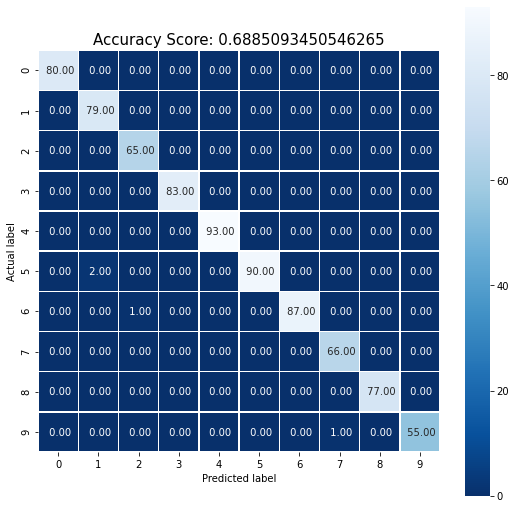

In [31]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm[0:10,0:10], annot=True, fmt=" .2f", linewidth=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title('Accuracy Score: {0}'.format(score[1]), size=15)
plt.show()